In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from tqdm import tqdm
from scipy.stats import norm

sns.set()

# Exp Params

# Load & Prepare Data
In this particular analysis we only care about data at the national assembly level

In [19]:
folder_name = "exp2b"
file_postfix = ""

data_path = f"data/{folder_name}"
figs_path = f"figs/{folder_name}"
data_path, figs_path

('data/exp2b', 'figs/exp2b')

## Load

In [20]:
NROWS = None

### Amended Formula

In [21]:
amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", nrows=10)
amend_df.columns

Index(['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
       'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
       'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc',
       'abs_diff_seats', 'abs_diff_perc', 'max_diff_seats', 'mean_diff_seats',
       'min_diff_seats', 'max_diff_perc', 'mean_diff_perc', 'min_diff_perc',
       'tot_party_seats', 'tot_party_votes', 'tot_forf_seats',
       'tot_forf_votes', 'tot_ind_seats', 'tot_ind_votes', 'tot_seats',
       'tot_votes'],
      dtype='object')

In [22]:
cols = ["index", "votes", "seats", "diff_seats", "is_ind", "is_forfeit", "tot_seats"]

amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv", usecols=cols, nrows=NROWS)
print(f"Shape: {amend_df.shape}")
amend_df.head()

Shape: (1024000, 7)


,index,seats,is_ind,is_forfeit,votes,diff_seats,tot_seats
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,3|81|3|3|3|3|3|2|2|2|3|2|2|3|2|99|1|2|1|3|2|2|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,144404|4168288|149124|171936|138812|189706|162...,-0.19731123990232247|-0.09909748725776524|-0.1...,400
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,3|2|3|2|2|3|2|329|3|2|2|2|1|2|2|2|2|2|2|2|2|2|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,169144|114760|134508|112766|113242|139216|1174...,0.7151468529873934|0.5206348014049169|-0.04561...,400
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,206|152|2|2|1|2|2|2|2|2|1|2|1|1|2|1|1|1|1|1|1|...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,9996740|7350016|119498|79866|50448|83230|95162...,0.40954711166193647|-0.23917858987340423|0.467...,400
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,159|82|2|103|1|2|1|2|1|2|1|1|2|1|1|1|1|2|1|1|1...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,7506628|3878878|92092|4848348|54238|81460|5655...,0.3406222743967362|0.3356151718810878|-0.04519...,400
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,42|48|64|22|38|42|1|2|1|2|27|2|2|1|2|1|1|1|1|1...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1889770|2174054|2925418|1018230|1741902|190379...,-0.19586815219079057|0.092857892895438|0.71399...,400


### Original Formula

In [23]:
cols = ["party", "votes", "seats", "diff_seats", "is_forfeit"]
orig_df = pd.read_csv(f"{data_path}/nat_orig{file_postfix}.csv", nrows=NROWS, usecols=cols)
orig_df.head()
# amend_df.head()
# drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
#              "mean_diff_perc", "min_diff_perc"]
# cols = set(orig_df.columns) - set(drop_cols)
# cols = list(cols)
# cols

,party,votes,seats,is_forfeit,diff_seats
0,party_22|party_6|party_10|party_5|party_15|par...,74562|85968|69406|2551716|94853|81277|2084144|...,3|3|3|100|3|3|82|2|2|2|3|3|2|2|4|2|2|2|1|63|2|...,False|False|False|False|False|False|False|Fals...,-0.061626745572903374|0.387866097161941|-0.264...
1,party_18|party_24|party_17|party_22|party_12|p...,84572|57380|67254|56383|56621|69608|58746|7959...,3|2|3|2|2|3|3|3|2|335|2|2|1|2|2|2|2|2|2|2|2|2|...,False|False|False|False|False|False|False|Fals...,0.7813199521500187|0.5655316044833758|0.007010...
2,party_3|party_17|party_13|party_6|party_7|part...,4998370|59749|39933|25224|41615|47581|57400|44...,210|2|2|1|2|2|2|2|2|1|2|1|1|2|1|1|1|1|1|154|1|...,False|False|False|False|False|False|False|Fals...,0.08605303985947899|0.5113050020463801|-0.3215...
3,party_3|party_4|party_2|party_1|party_17|party...,2424174|3753314|1939439|46046|27119|40730|2827...,105|163|84|2|1|2|1|2|1|2|1|1|2|1|1|1|1|2|1|1|1...,False|False|False|False|False|False|False|Fals...,0.2830924949161897|0.00830923211941581|0.23080...
4,party_5|party_8|party_6|party_7|party_2|party_...,509115|944885|863024|951895|870951|460416|2446...,23|42|39|43|39|20|1|2|1|2|28|2|2|1|2|49|1|1|1|...,False|False|False|False|False|False|False|Fals...,0.0430191575944896|0.7663752918764288|0.061270...


In [24]:
amend_df["tot_seats"].describe()

count    1024000.0
mean         400.0
std            0.0
min          400.0
25%          400.0
50%          400.0
75%          400.0
max          400.0
Name: tot_seats, dtype: float64

# Prepare Data

In [25]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items() if type(val) == str and "|" in val}
    df = pd.DataFrame.from_dict(df_dict)
    df.rename({"index": "party"}, axis=1, inplace=True)
    df.set_index("party", inplace=True)
    return df

In [26]:
bool_map = {
    "True": True,
    "False": False
}

### Ammended

In [27]:
amend_cols = ["votes", "seats", "is_ind", "is_forfeit"]
amend_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str",
    "is_ind": "str"
}

#### Only Parties

I.e. inter-party proportionality

In [28]:
def prep_amend_p(df):
    p_df = df[amend_cols].astype(amend_type_dict)
    p_df["is_forfeit"] = p_df["is_forfeit"].map(bool_map)
    p_df["is_ind"] = p_df["is_ind"].map(bool_map)
    p_df = p_df[p_df["is_ind"]==False]
    
    # print(p_df.info())
    
    # All Cands
    tot_votes = p_df["votes"].sum()
    tot_seats = p_df["seats"].sum()
    
    p_df["vote_perc"] = p_df["votes"]/tot_votes
    p_df["seat_perc"] = p_df["seats"]/tot_seats
    
    p_df["opt_seats"] = p_df["vote_perc"] * tot_seats
    p_df["seat_diff"] = p_df["opt_seats"] - p_df["seats"]
    
    return p_df

### Original

In [29]:
orig_cols = ["votes", "seats", "is_forfeit"]
orig_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str"
}

In [30]:
def prep_orig(df):
    df = df[orig_cols].astype(orig_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

## Combine DFs

### Amended

#### Only Parties

In [32]:
n_rows = amend_df.shape[0]
dfs_arr = [prep_amend_p(row_to_df(amend_df.iloc[i])).reset_index() for i in range(n_rows)]
all_amend_p_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_p_df.shape}")
all_amend_p_df.head()

Shape: (40962019, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,144404,3,False,False,0.007113,0.007614,2.802689,-0.197311
1,1,4168288,81,False,False,0.205332,0.205584,80.900903,-0.099097
2,2,149124,3,False,False,0.007346,0.007614,2.894298,-0.105702
3,3,171936,3,False,False,0.008470,0.007614,3.337048,0.337048
4,4,138812,3,False,False,0.006838,0.007614,2.694156,-0.305844


In [33]:
all_amend_p_df.to_csv(f"{data_path}/proc_nat_amend{file_postfix}.csv", index=False)

### Original

In [34]:
n_rows = orig_df.shape[0]
dfs_arr = [prep_orig(row_to_df(orig_df.iloc[i])).reset_index() for i in range(n_rows)]
all_orig_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_orig_df.shape}")
all_orig_df.head()

Shape: (40962019, 8)


,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_22,74562,3,False,0.007346,0.0075,2.938373,-0.061627
1,party_6,85968,3,False,0.008470,0.0075,3.387866,0.387866
2,party_10,69406,3,False,0.006838,0.0075,2.735183,-0.264817
3,party_5,2551716,100,False,0.251398,0.2500,100.559186,0.559186
4,party_15,94853,3,False,0.009345,0.0075,3.738010,0.738010


In [35]:
all_orig_df.to_csv(f"{data_path}/proc_nat_orig{file_postfix}.csv", index=False)

# Analysis

## Common Fuctions

In [36]:
def calc_stats(x):
    stats = {
        "min": x.min(),
        "mean": x.mean(),
        "max": x.max()
    }
    return stats

## Inter-Party Proportionality
Optimal seats for amended formula is only calculated using parties 

### Load Existing

In [11]:
all_amend_p_df = pd.read_csv(f"{data_path}/proc_nat_amend{file_postfix}.csv")
all_amend_p_df.head()

,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,144404,3,False,False,0.007113,0.007614,2.802689,-0.197311
1,1,4168288,81,False,False,0.205332,0.205584,80.900903,-0.099097
2,2,149124,3,False,False,0.007346,0.007614,2.894298,-0.105702
3,3,171936,3,False,False,0.008470,0.007614,3.337048,0.337048
4,4,138812,3,False,False,0.006838,0.007614,2.694156,-0.305844


In [12]:
all_orig_df = pd.read_csv(f"{data_path}/proc_nat_orig{file_postfix}.csv")
all_orig_df.head()

,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_22,74562,3,False,0.007346,0.0075,2.938373,-0.061627
1,party_6,85968,3,False,0.008470,0.0075,3.387866,0.387866
2,party_10,69406,3,False,0.006838,0.0075,2.735183,-0.264817
3,party_5,2551716,100,False,0.251398,0.2500,100.559186,0.559186
4,party_15,94853,3,False,0.009345,0.0075,3.738010,0.738010


### All

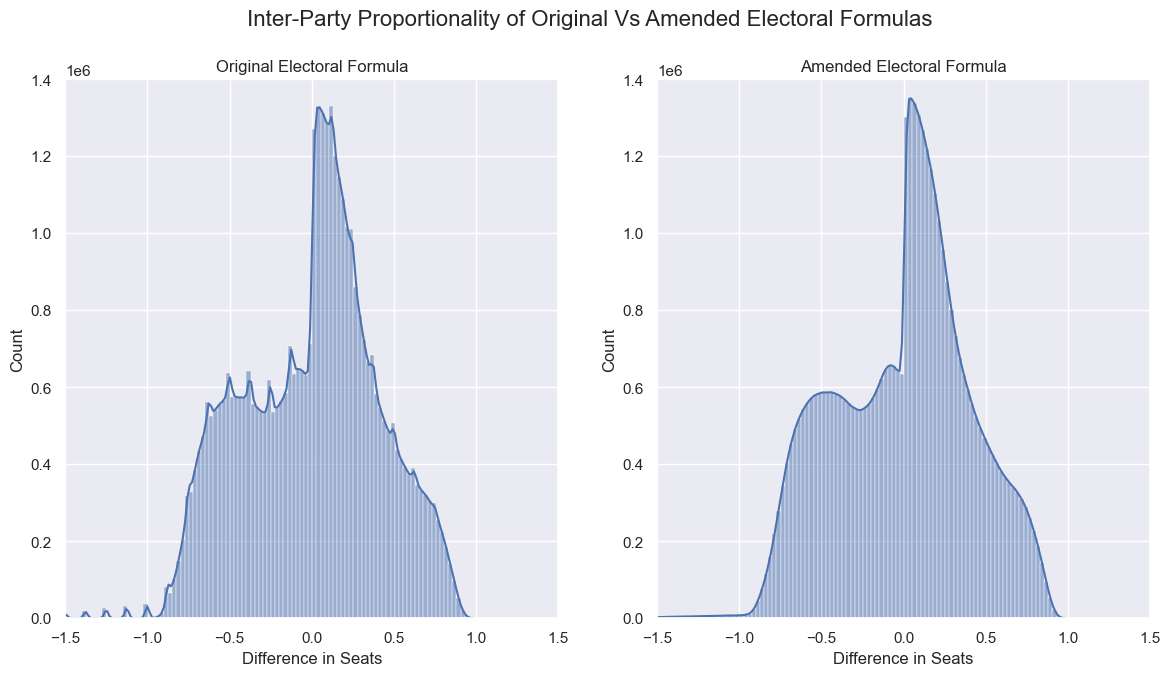

In [42]:
y_max = 1400000
# y_max = None

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-1.5, 1.5)
    if y_max is not None:
        ax.set_ylim(0, y_max)

axs[0].set_xlabel("Difference in Seats")
axs[1].set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop.png")

In [38]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.875, mean: 0.0, max: 0.98
Ammended:
	 min: -1.875, mean: 0.0, max: 0.981


In [39]:
x1 = orig_all_data["seat_diff"]
mu1, std1 = norm.fit(x1)
mu1, std1

(7.781911187978221e-19, 0.4085060936287563)

In [40]:
x2 = amend_all_data["seat_diff"]
mu2, std2 = norm.fit(x2)
mu2, std2

(2.5540375843406973e-19, 0.40968429839295284)

In [41]:
print(f"Difference: ")
print(f"\t mu = {round(mu1 - mu2, 4)}")
print(f"\t std = {round(std1 - std2, 4)}")

Difference: 
	 mu = 0.0
	 std = -0.0012


## KDE

In [43]:
all_orig_df.head()

,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_22,74562,3,False,0.007346,0.0075,2.938373,-0.061627
1,party_6,85968,3,False,0.008470,0.0075,3.387866,0.387866
2,party_10,69406,3,False,0.006838,0.0075,2.735183,-0.264817
3,party_5,2551716,100,False,0.251398,0.2500,100.559186,0.559186
4,party_15,94853,3,False,0.009345,0.0075,3.738010,0.738010


In [45]:
orig_p1_data = all_orig_df[all_orig_df["party"] == "party_1"]
orig_p1_data.head()

,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
21,party_1,50746,2,False,0.005000,0.005,1.999821,-0.000179
59,party_1,44727,2,False,0.005000,0.005,1.999800,-0.000200
81,party_1,47581,2,False,0.005000,0.005,1.999873,-0.000127
107,party_1,46046,2,False,0.005000,0.005,1.999801,-0.000199
158,party_1,44183,2,False,0.004999,0.005,1.999764,-0.000236


In [56]:
amend_all_data.head()

,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,144404,3,False,False,0.007113,0.007614,2.802689,-0.197311
1,1,4168288,81,False,False,0.205332,0.205584,80.900903,-0.099097
2,2,149124,3,False,False,0.007346,0.007614,2.894298,-0.105702
3,3,171936,3,False,False,0.008470,0.007614,3.337048,0.337048
4,4,138812,3,False,False,0.006838,0.007614,2.694156,-0.305844


In [57]:
amend_all_data["votes"].iloc[:100].value_counts()

votes
144404    1
93748     1
43602     1
45516     1
101284    1
         ..
98720     1
90262     1
75646     1
78890     1
68728     1
Name: count, Length: 100, dtype: int64

In [54]:
amend_p1_data = amend_all_data[amend_all_data["party"] == "1"]
amend_p1_data.head()

,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
1,1,4168288,81,False,False,0.205332,0.205584,80.900903,-0.099097
44,1,114760,2,False,False,0.006414,0.005089,2.520635,0.520635
77,1,7350016,152,False,False,0.386160,0.386768,151.760821,-0.239179
105,1,3878878,82,False,False,0.210577,0.209719,82.335615,0.335615
147,1,2174054,48,False,False,0.123000,0.122762,48.092858,0.092858


C:\Users\simon\AppData\Local\Temp\ipykernel_15436\3449998321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amend_p1_data["votes"])


<Axes: xlabel='votes', ylabel='Density'>

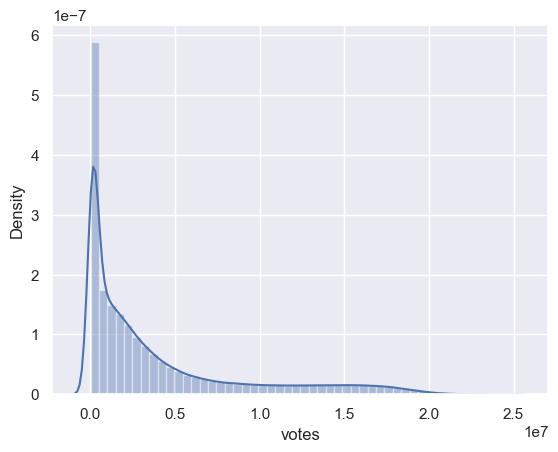

In [55]:
sns.distplot(amend_p1_data["votes"])

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))

cmap = matplotlib.cm.get_cmap("Blues")
bg_color = cmap(0)    
    
kde_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "fill": True,
    "cmap": "Blues",
    "levels": 500,
    "thresh": 0
}

reg_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "color": "aqua",
    "scatter": False
}

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")

sns.kdeplot(data=orig_p1_data, ax=axs[0], **kde_kwargs)
sns.kdeplot(data=amend_p1_data, ax=axs[1], **kde_kwargs)

for ax in axs:
    sns.lineplot(x=[0,100], y=[0,0], ax=ax, color='black', linewidth=2)

sns.regplot(data=amend_p1_data, ax=axs[1], **reg_kwargs)
sns.regplot(data=orig_p1_data, ax=axs[0], **reg_kwargs)
    
for ax in axs:
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 2)
    ax.set_xlabel("Percentage of Votes (%)")

for ax in axs:
    ax.set_ylabel("Seats - Optimal Seats")
# axs[0].set_ylabel("Difference in Seats")
# axs[1].set_ylabel("Difference in Seats")

fig.savefig(f"{figs_path}/ip_bias.png")